来自*GPyTorch*官方文档[Hyperparameters in GPyTorch](https://docs.gpytorch.ai/en/latest/examples/00_Basic_Usage/Hyperparameters.html)

先定义一个GP model

In [1]:
import math
import torch
import gpytorch
from matplotlib import pyplot as plt


train_x = torch.linspace(0, 1, 100)
train_y = torch.sin(train_x * (2 * math.pi)) + torch.randn(train_x.size()) * 0.2

# We will use the simplest form of GP model, exact inference
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# initialize likelihood and model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_x, train_y, likelihood)

----
+ 查看model中的参数

In [2]:
model

ExactGPModel(
  (likelihood): GaussianLikelihood(
    (noise_covar): HomoskedasticNoise(
      (raw_noise_constraint): GreaterThan(1.000E-04)
    )
  )
  (mean_module): ConstantMean()
  (covar_module): ScaleKernel(
    (base_kernel): RBFKernel(
      (raw_lengthscale_constraint): Positive()
    )
    (raw_outputscale_constraint): Positive()
  )
)

In [3]:
help(model)

Help on ExactGPModel in module __main__ object:

class ExactGPModel(gpytorch.models.exact_gp.ExactGP)
 |  ExactGPModel(train_x, train_y, likelihood)
 |  
 |  The base class for any Gaussian process latent function to be used in conjunction
 |  with exact inference.
 |  
 |  :param torch.Tensor train_inputs: (size n x d) The training features :math:`\mathbf X`.
 |  :param torch.Tensor train_targets: (size n) The training targets :math:`\mathbf y`.
 |  :param ~gpytorch.likelihoods.GaussianLikelihood likelihood: The Gaussian likelihood that defines
 |      the observational distribution. Since we're using exact inference, the likelihood must be Gaussian.
 |  
 |  The :meth:`forward` function should describe how to compute the prior latent distribution
 |  on a given input. Typically, this will involve a mean and kernel function.
 |  The result must be a :obj:`~gpytorch.distributions.MultivariateNormal`.
 |  
 |  Calling this model will return the posterior of the latent Gaussian process w

从上面的文档中，可以查看到model的继承关系：    
Method resolution order:
 |      ExactGPModel   
 |      gpytorch.models.exact_gp.ExactGP    
 |      gpytorch.models.gp.GP   
 |      gpytorch.module.Module   
 |      torch.nn.modules.module.Module   
 |      builtins.object   
 
*有关parameter的方法继承自：*  
Methods inherited from torch.nn.modules.module.Module


#用法为：  
 |  **named_parameters(self, prefix='', recurse=True)**    
 |      Returns an iterator over module parameters, yielding both the   
 |      name of the parameter as well as the parameter itself.   
 |      
 |      Args:   
 |          prefix (str): prefix to prepend to all parameter names.   
 |          recurse (bool): if True, then yields parameters of this module   
 |              and all submodules. Otherwise, yields only parameters that   
 |              are direct members of this module.   
 |      
 |      Yields:   
 |          (string, Parameter): Tuple containing the name and parameter   
 |      
 |      Example::    
 |      
 |          >>> for name, param in self.named_parameters():   
 |          >>>    if name in ['bias']:  
 |          >>>        print(param.size())  
 |  
 |  **parameters(self, recurse=True)**   
 |      Returns an iterator over module parameters.  
 |          
 |      This is typically passed to an optimizer.   
 |         
 |      Args:   
 |          recurse (bool): if True, then yields parameters of this module   
 |              and all submodules. Otherwise, yields only parameters that  
 |              are direct members of this module.   
 |      
 |      Yields:  
 |          Parameter: module parameter   
 |      
 |      Example::   
 |        
 |          >>> for param in model.parameters():  
 |          >>>     print(type(param.data), param.size())  
 |          <class 'torch.FloatTensor'> (20L,)   
 |          <class 'torch.FloatTensor'> (20L, 1L, 5L, 5L)   

In [4]:
model

ExactGPModel(
  (likelihood): GaussianLikelihood(
    (noise_covar): HomoskedasticNoise(
      (raw_noise_constraint): GreaterThan(1.000E-04)
    )
  )
  (mean_module): ConstantMean()
  (covar_module): ScaleKernel(
    (base_kernel): RBFKernel(
      (raw_lengthscale_constraint): Positive()
    )
    (raw_outputscale_constraint): Positive()
  )
)

In [5]:
model.parameters()

<generator object Module.parameters at 0x0000028402222F48>

In [6]:
list(model.parameters())

[Parameter containing:
 tensor([0.], requires_grad=True),
 Parameter containing:
 tensor([0.], requires_grad=True),
 Parameter containing:
 tensor(0., requires_grad=True),
 Parameter containing:
 tensor([[0.]], requires_grad=True)]

In [7]:
print(list(model.named_parameters()))
for param_name, param in model.named_parameters():
    print(f'Parameter name: {param_name:42} value = {param.item()}')

[('likelihood.noise_covar.raw_noise', Parameter containing:
tensor([0.], requires_grad=True)), ('mean_module.constant', Parameter containing:
tensor([0.], requires_grad=True)), ('covar_module.raw_outputscale', Parameter containing:
tensor(0., requires_grad=True)), ('covar_module.base_kernel.raw_lengthscale', Parameter containing:
tensor([[0.]], requires_grad=True))]
Parameter name: likelihood.noise_covar.raw_noise           value = 0.0
Parameter name: mean_module.constant                       value = 0.0
Parameter name: covar_module.raw_outputscale               value = 0.0
Parameter name: covar_module.base_kernel.raw_lengthscale   value = 0.0


----
+ **Raw vs Actual Parameters**   
actual parameter一般都需要有限制（constraints），比如，  
+ scale kernel中的output scale需要为正数   
+ RBF kernel中的lengthscale 也需要为正数
+ likelihood中的加性噪声方差需要大于一定的值 等   

为了加入这些限制，对actual parameter进行变形，引入raw parameter，   
例如，对于要大于零的参数$\theta$,引入raw参数$\lambda\$:  
$$\theta=e^{\lambda}$$


+ **查看raw参数值以及参数限制**    
调用类的属性，或者使用.named_paramters(), .named_constraints()方法；

In [8]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

print(model.covar_module)
print(list(model.covar_module.named_parameters()))
print(list(model.covar_module.constraints()))

ScaleKernel(
  (base_kernel): RBFKernel(
    (raw_lengthscale_constraint): Positive()
  )
  (raw_outputscale_constraint): Positive()
)
[('raw_outputscale', Parameter containing:
tensor(0., requires_grad=True)), ('base_kernel.raw_lengthscale', Parameter containing:
tensor([[0.]], requires_grad=True))]
[Positive(), Positive()]


In [9]:
print('raw_outputscale, ', model.covar_module.raw_outputscale)
print('raw_outputscale constraint ', model.covar_module.raw_outputscale_constraint)

raw_outputscale,  Parameter containing:
tensor(0., requires_grad=True)
raw_outputscale constraint  Positive()


In [10]:
print('raw_lengthscale, ', model.covar_module.base_kernel.raw_lengthscale)
print('raw_lengthscale constraint ', model.covar_module.base_kernel.raw_lengthscale_constraint)

raw_lengthscale,  Parameter containing:
tensor([[0.]], requires_grad=True)
raw_lengthscale constraint  Positive()


+ **raw param 与 actual param间的互相转换**   
利用constraint.transform(), .inverse.transform()方法；

In [11]:
raw_outputscale = model.covar_module.raw_outputscale
constraint = model.covar_module.raw_outputscale_constraint

trans_param = constraint.transform(raw_outputscale)
print('Transformed outputscale', trans_param)

print(constraint.inverse_transform(trans_param))

print('Transform a bunch of negative tensors: ', constraint.transform(torch.tensor([-1., -2., -3.])))

Transformed outputscale tensor(0.6931, grad_fn=<SoftplusBackward>)
tensor(0., grad_fn=<AddBackward0>)
Transform a bunch of negative tensors:  tensor([0.3133, 0.1269, 0.0486])


In [12]:
raw_lengthscale = model.covar_module.base_kernel.raw_lengthscale
constraint = model.covar_module.base_kernel.raw_lengthscale_constraint

trans_param = constraint.transform(raw_lengthscale)
print('Transformed lengthscale', trans_param)

print(constraint.inverse_transform(trans_param))

print('Transform a bunch of negative tensors: ', constraint.transform(torch.tensor([-1., -2., -3.])))

Transformed lengthscale tensor([[0.6931]], grad_fn=<SoftplusBackward>)
tensor([[0.]], grad_fn=<AddBackward0>)
Transform a bunch of negative tensors:  tensor([0.3133, 0.1269, 0.0486])


+ 这里的softplus函数为：  
$$ f(x) = \ln (1+e^x)$$   
该函数恒大于0， 上面的x为raw， 计算出的函数值为真实的param  

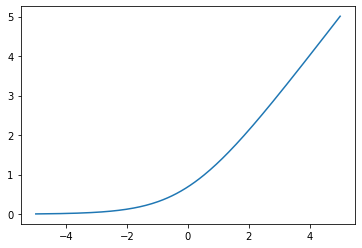

In [13]:
x = torch.linspace(-5,5, 200)
y = torch.log(1 + torch.exp(x))
plt.plot(x, y)

# 其他修改超参数的办法